In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plotting with Plotly

# Handling warnings
import warnings

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For preprocessing the data: Label Encoding and Standard Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For building models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors model

# For evaluating models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For checking data skewness
from scipy.stats import skew

# Additional Plotly imports for advanced plotting and graph creation
import plotly.express as px  # Repeated import of Plotly for consistency
import plotly.graph_objects as go  # For creating detailed graphs
import math
from plotly.subplots import make_subplots  # For creating subplots in Plotly
from numpy import linalg as LA  # Linear algebra functions for advanced computations

# Feature selection
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection

# Data splitting again (re-import, same as above)
from sklearn.model_selection import train_test_split

# Support Vector Machine for classification
from sklearn.svm import SVC

# For resampling and dealing with imbalanced datasets
from sklearn.utils import resample


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



warnings.filterwarnings('ignore')


Loading the DataSet

In [ ]:
import glob

file_path = glob.glob('**/IBM_data.csv', recursive=True)[0]
df = pd.read_csv(file_path)

Data Exploration

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Data Cleaning & Reduction

In [10]:
df.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Exploratory Data Analysis

distribution of employee attrition

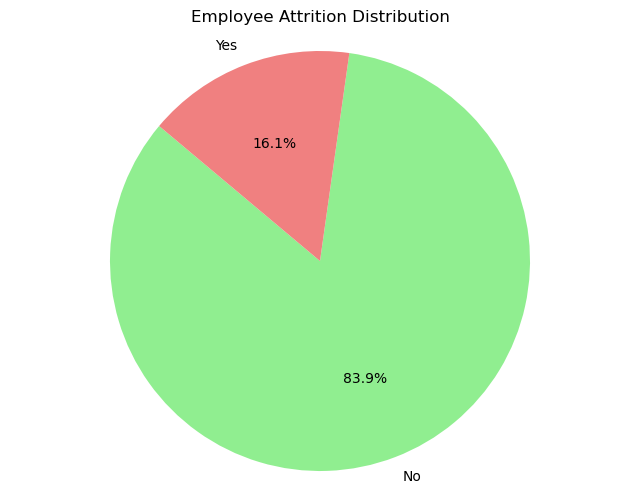

In [12]:
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

Univariate Analysis on numerical columns

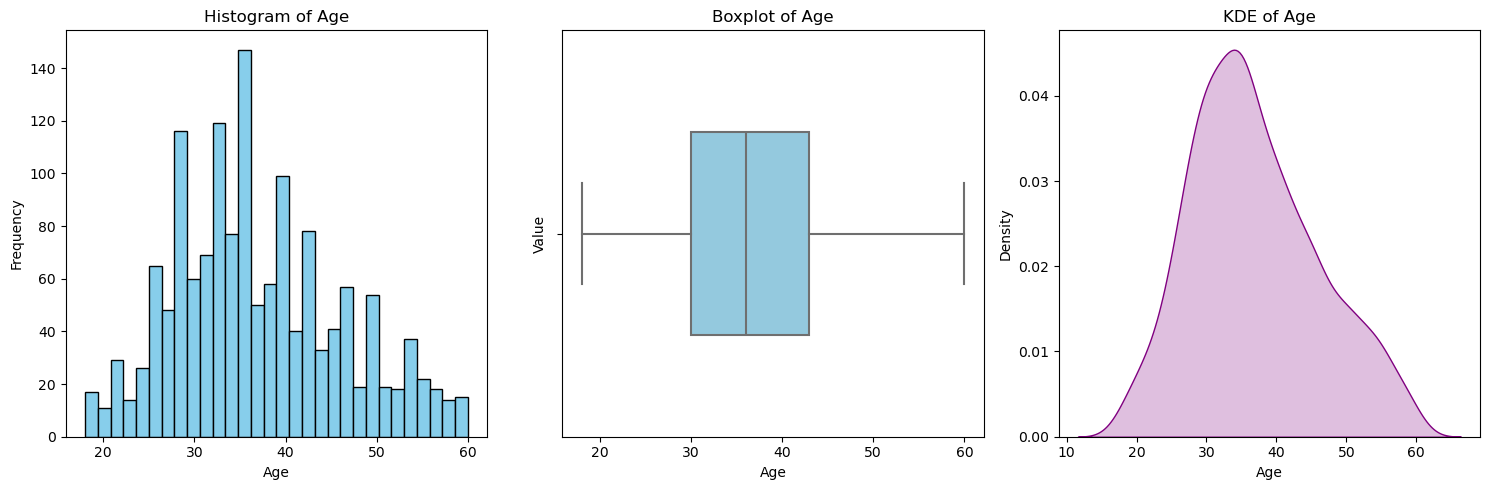

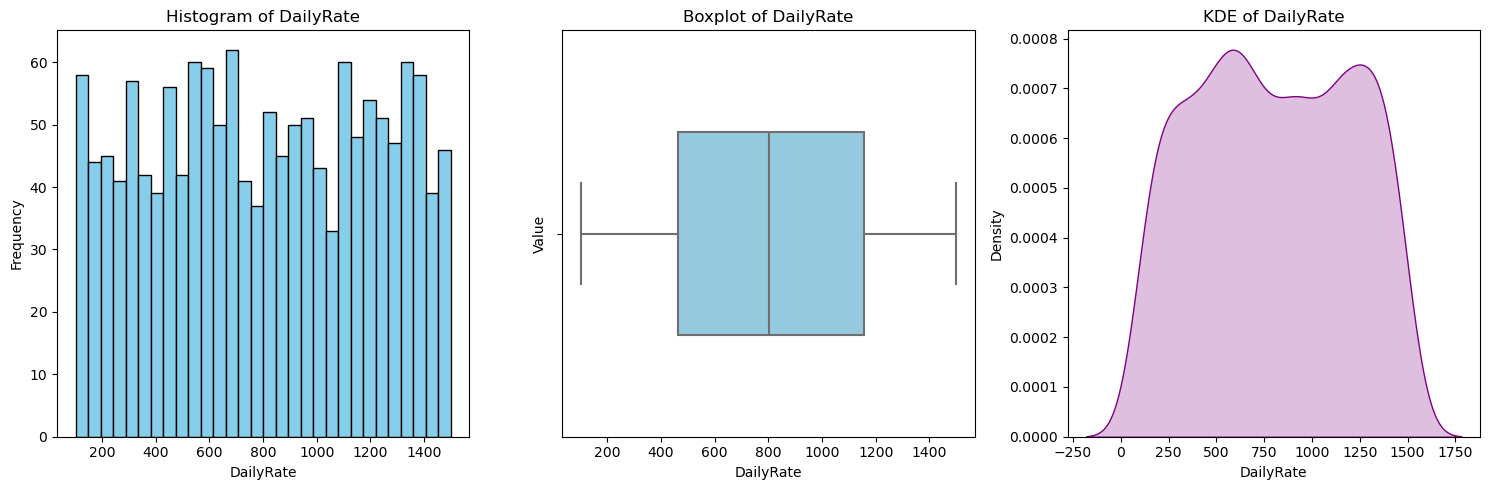

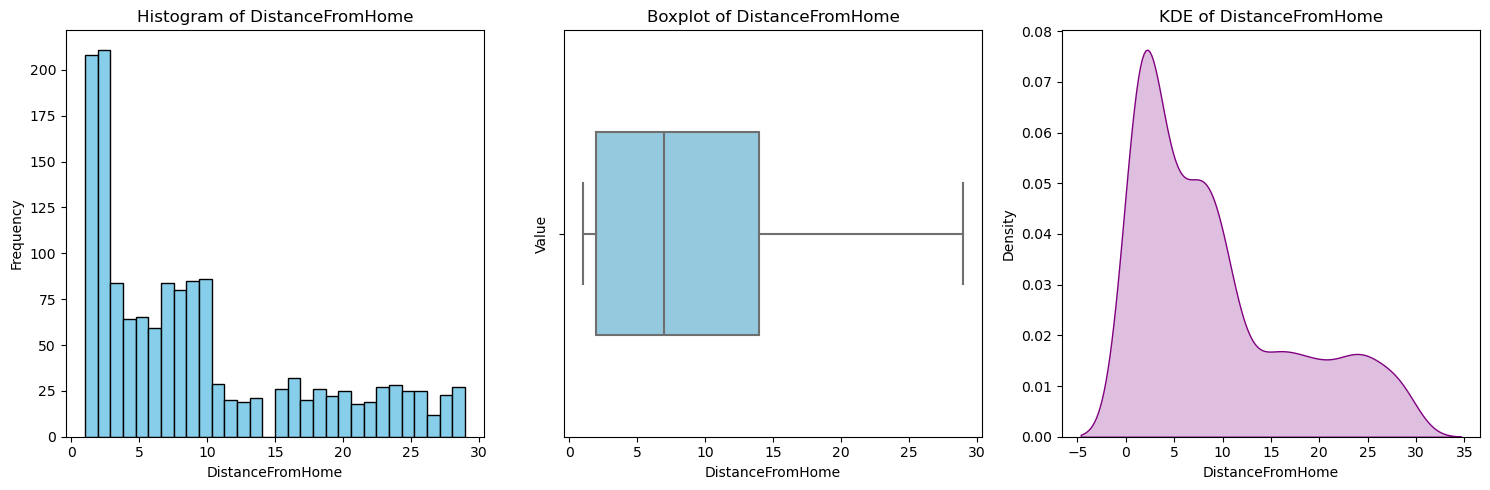

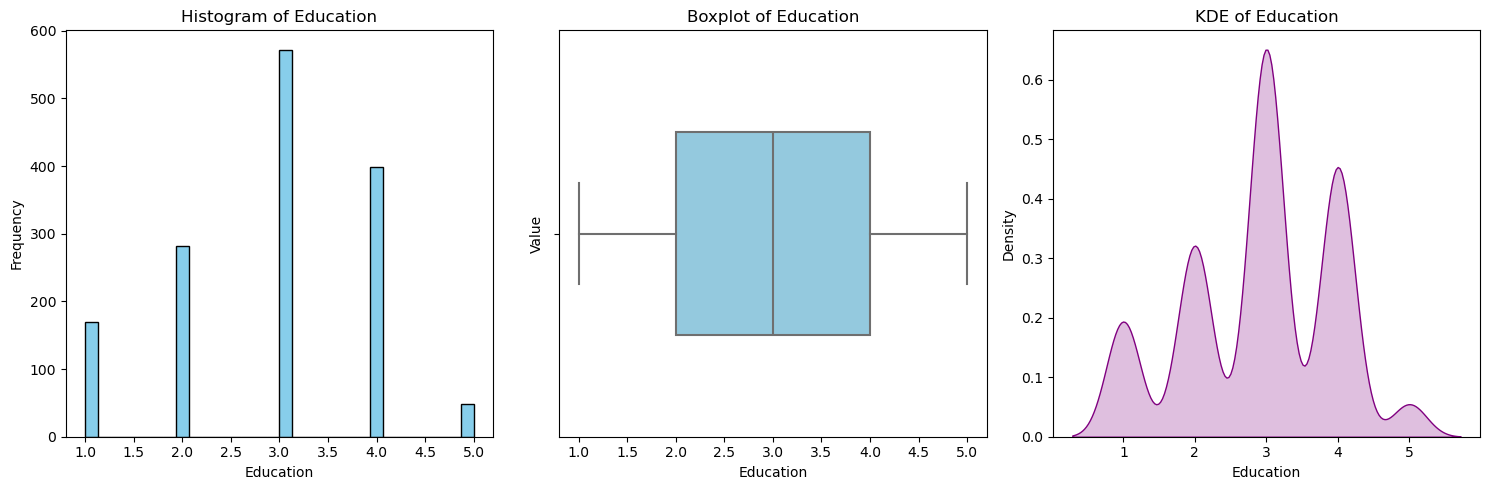

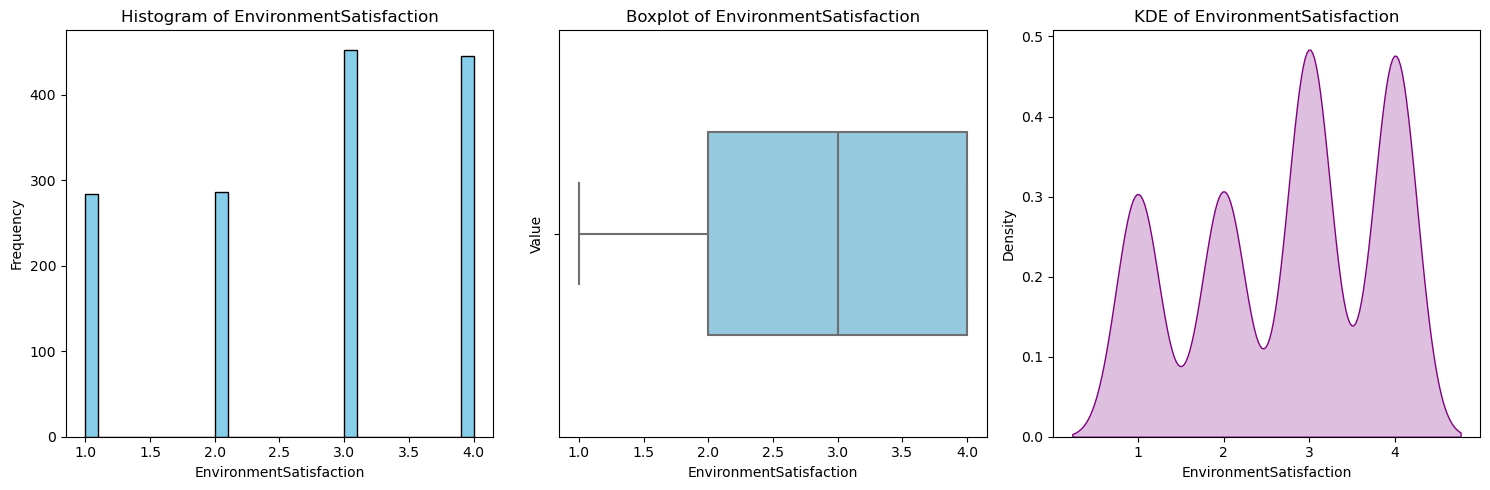

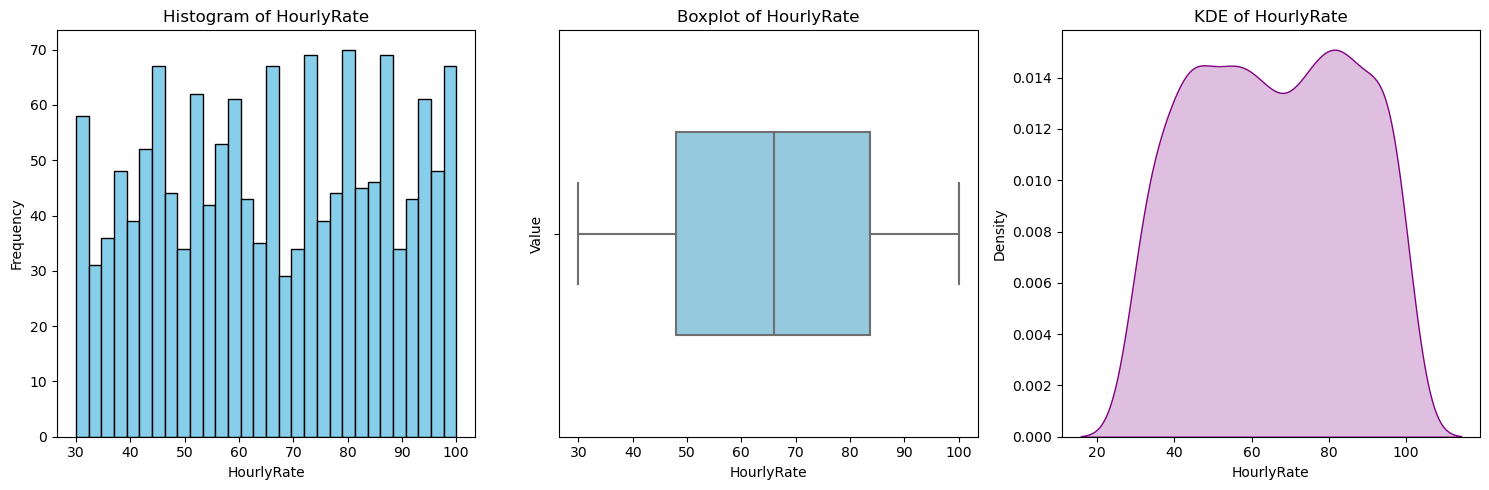

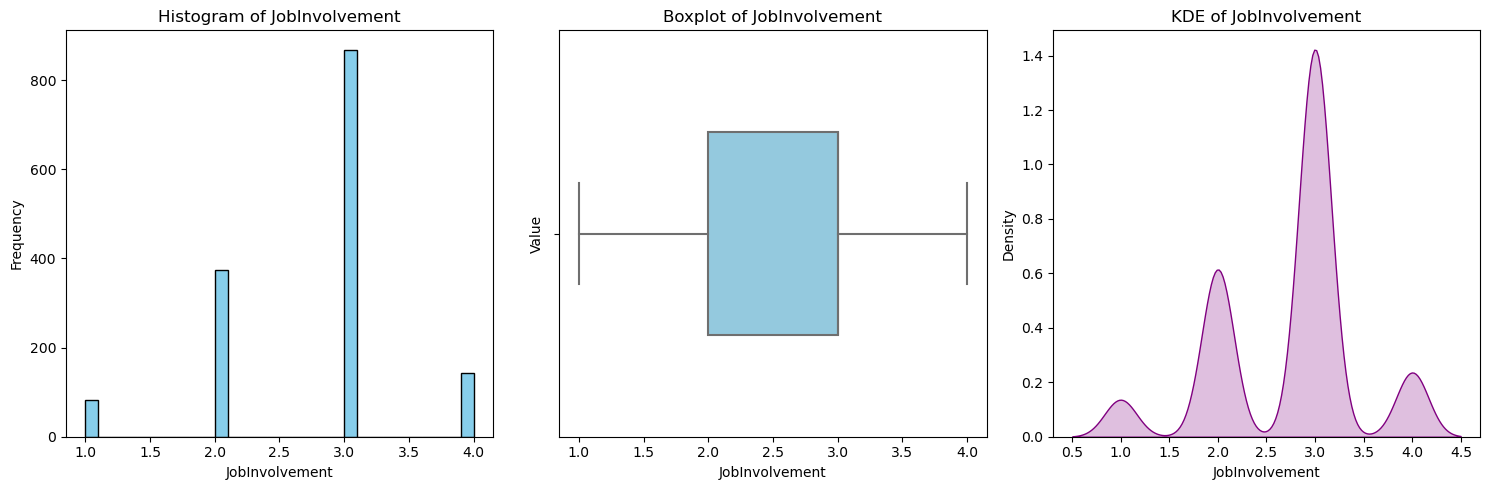

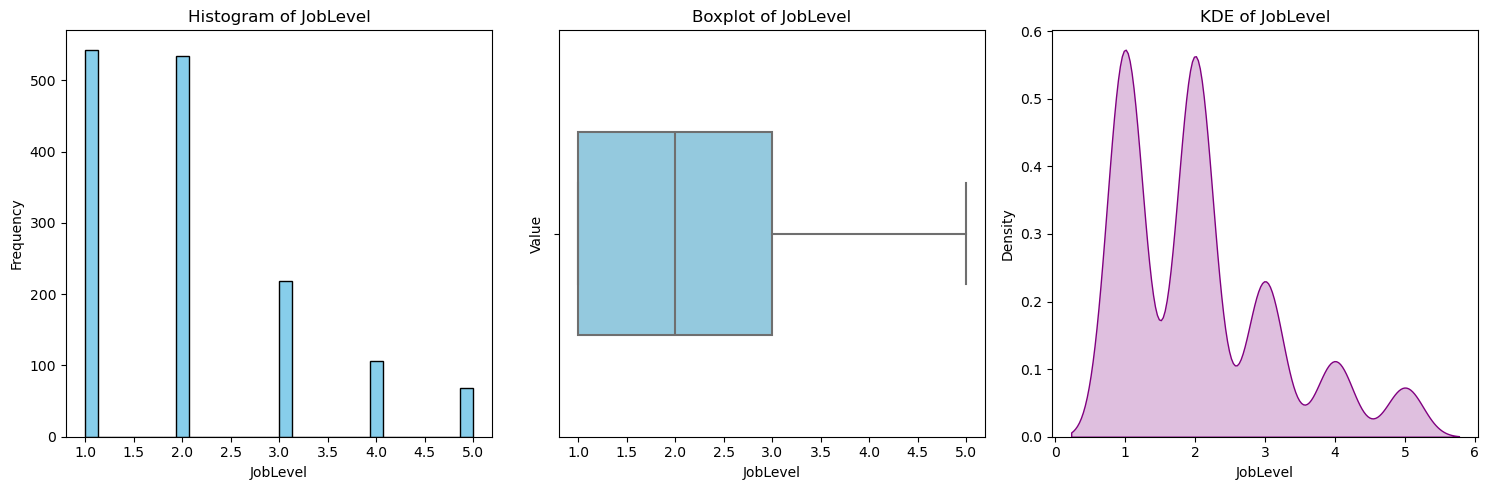

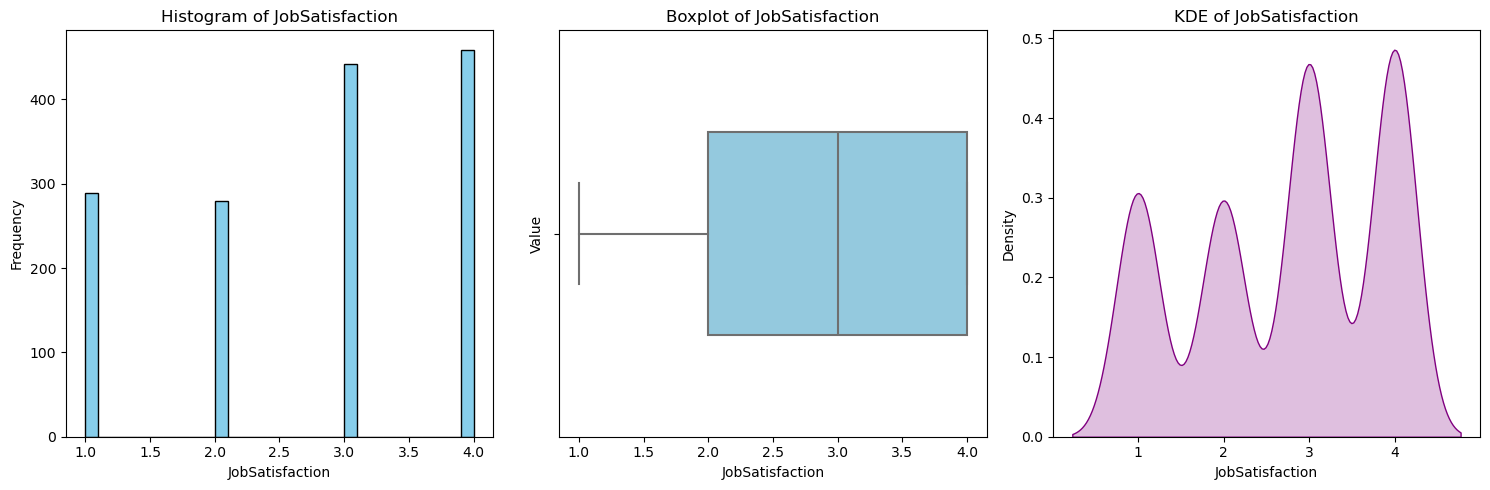

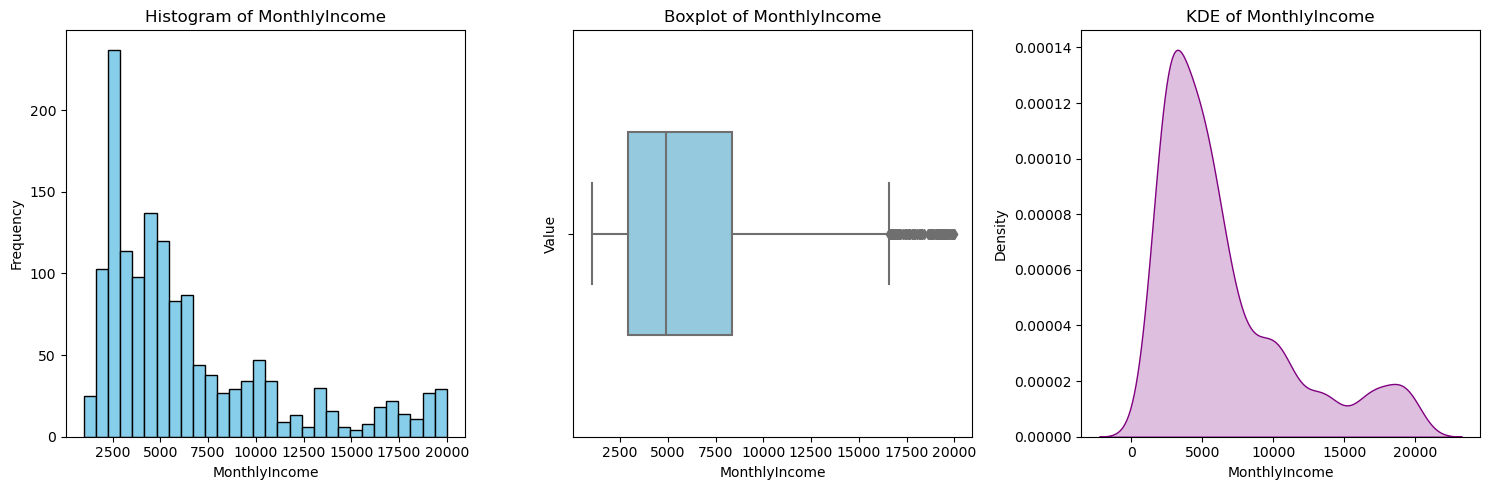

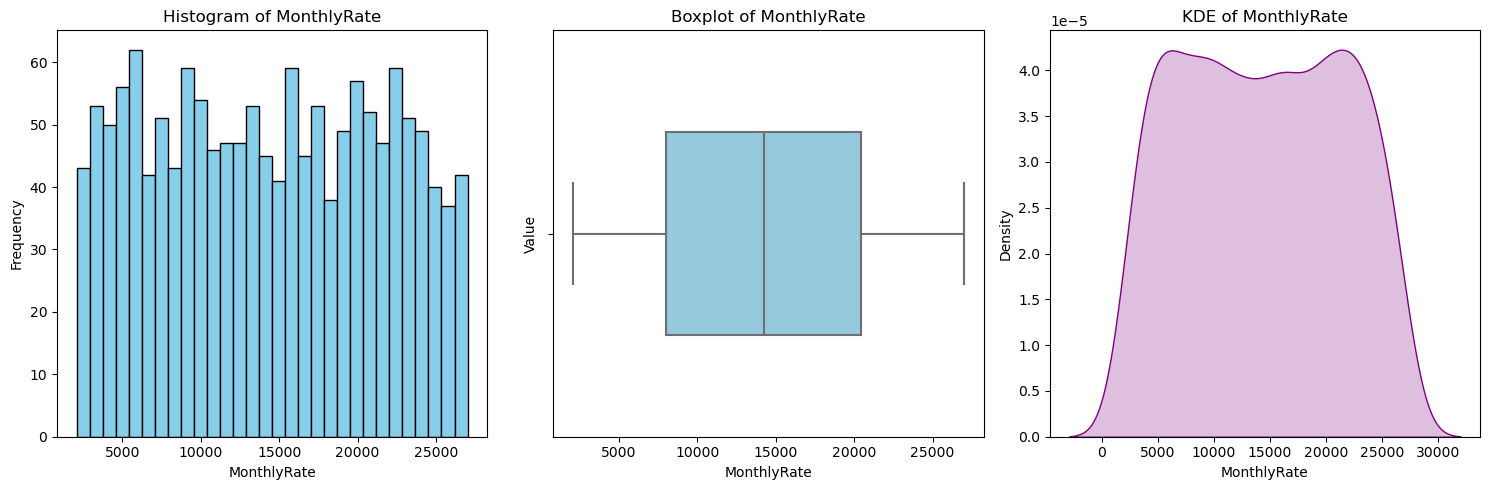

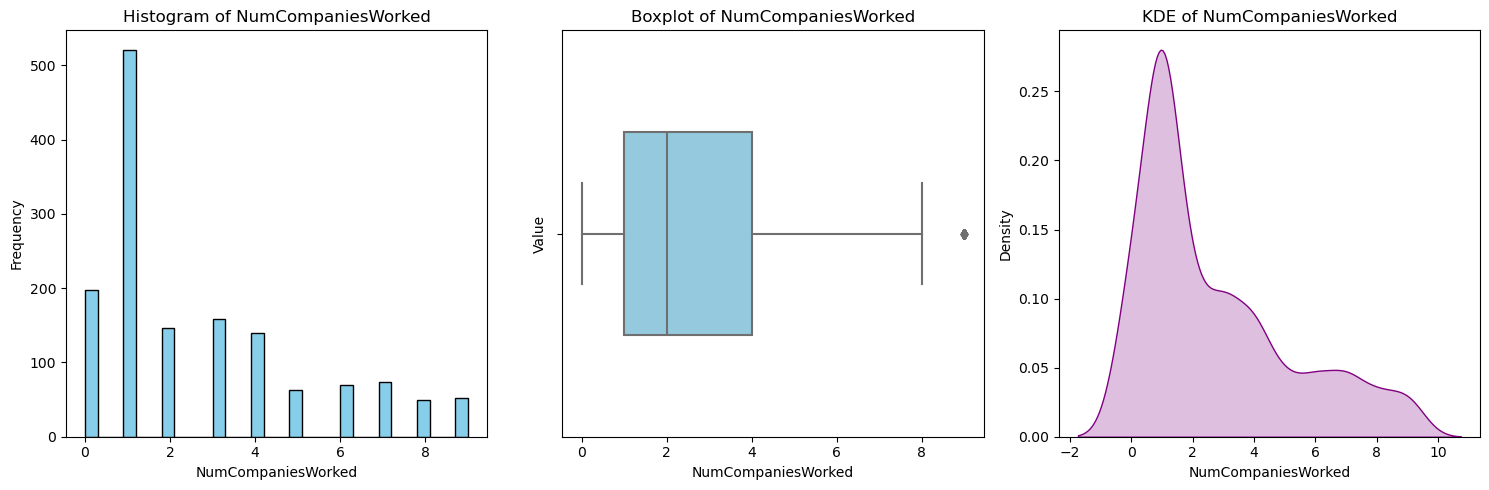

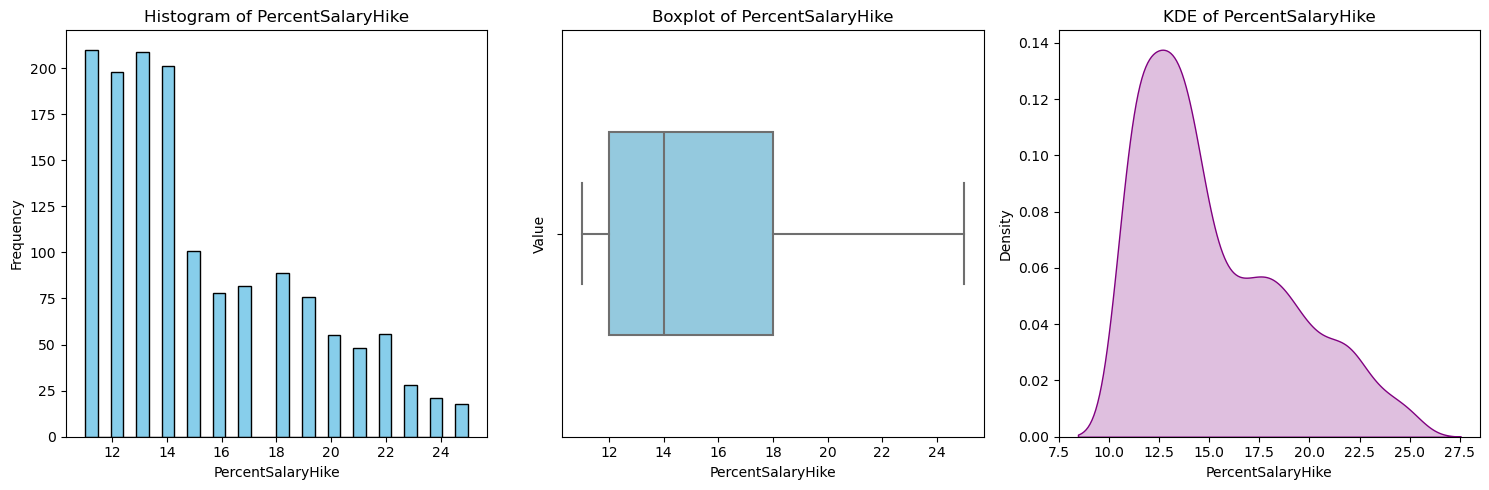

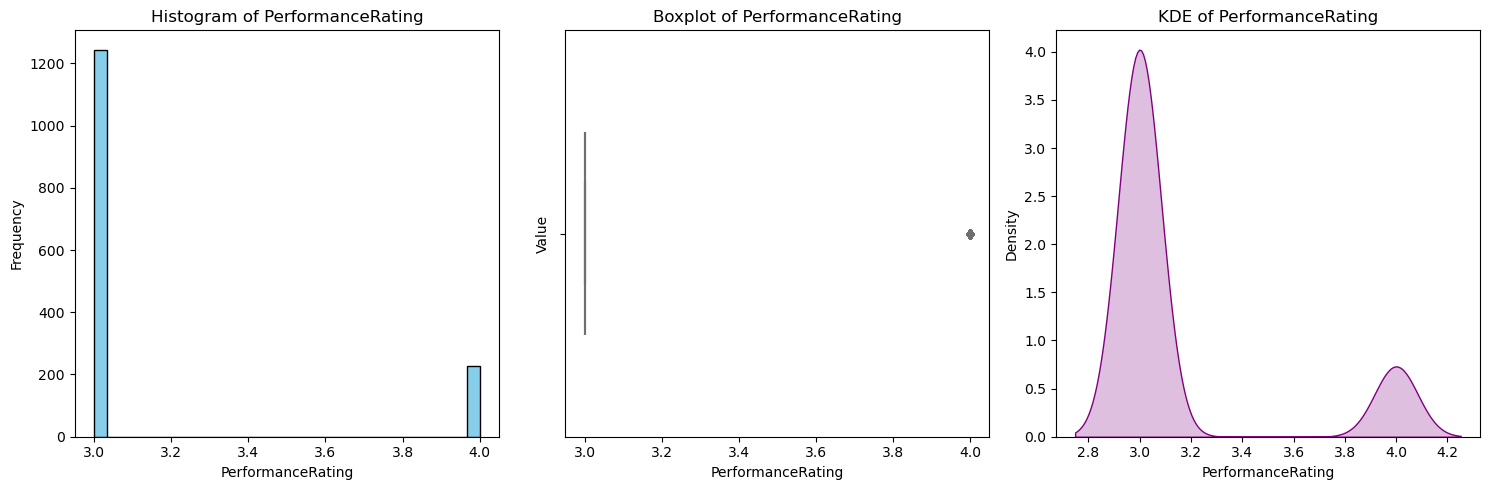

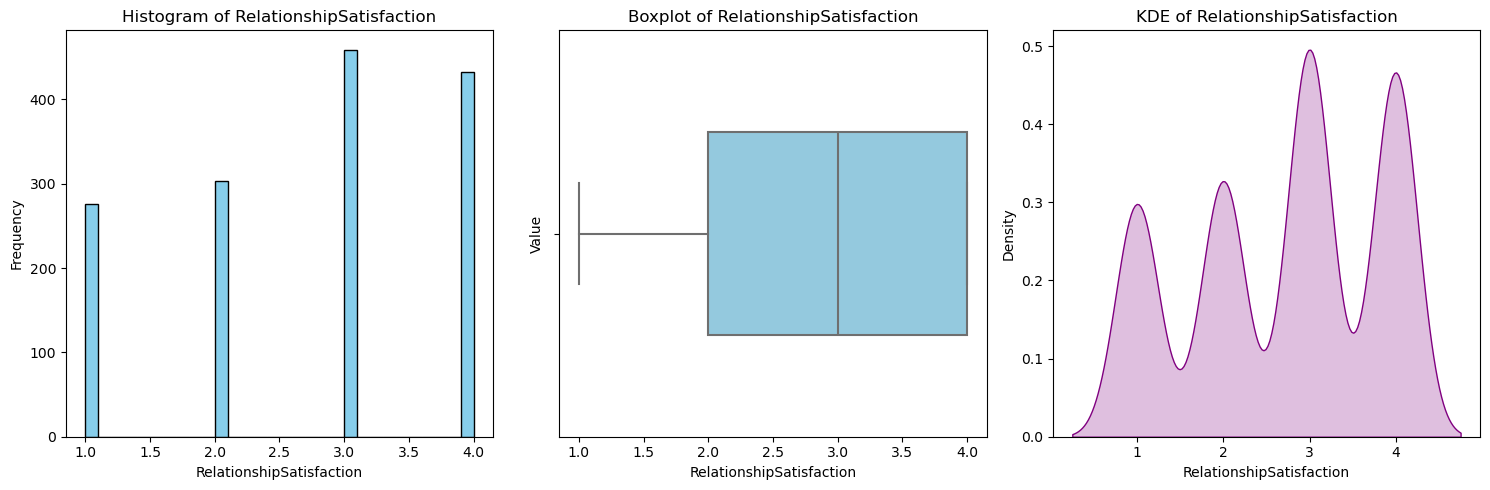

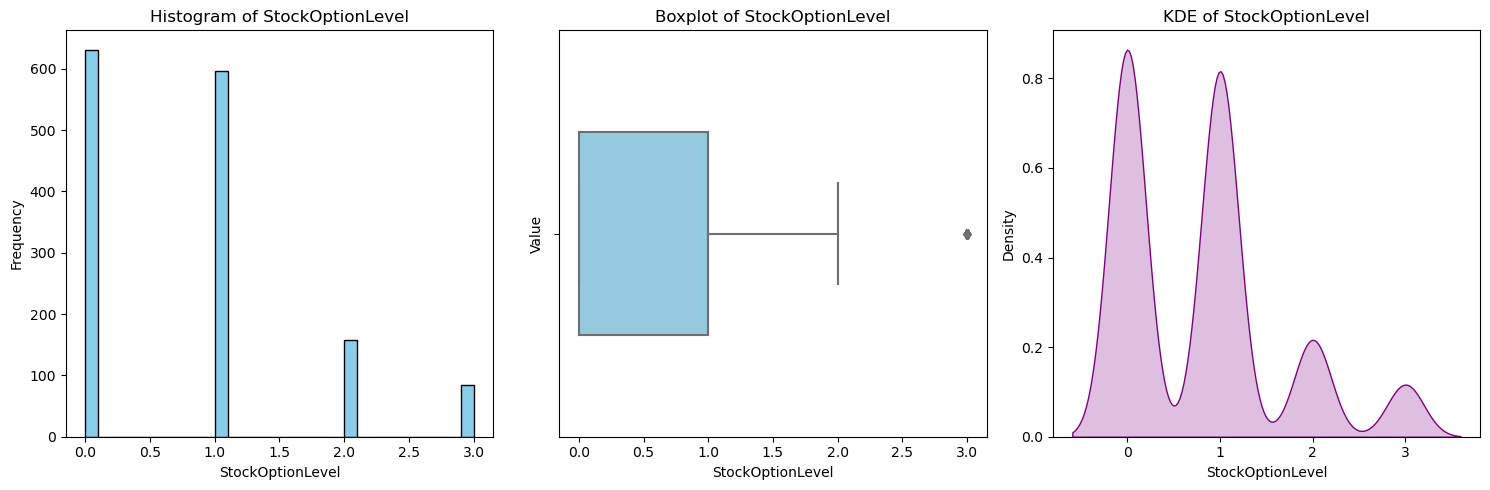

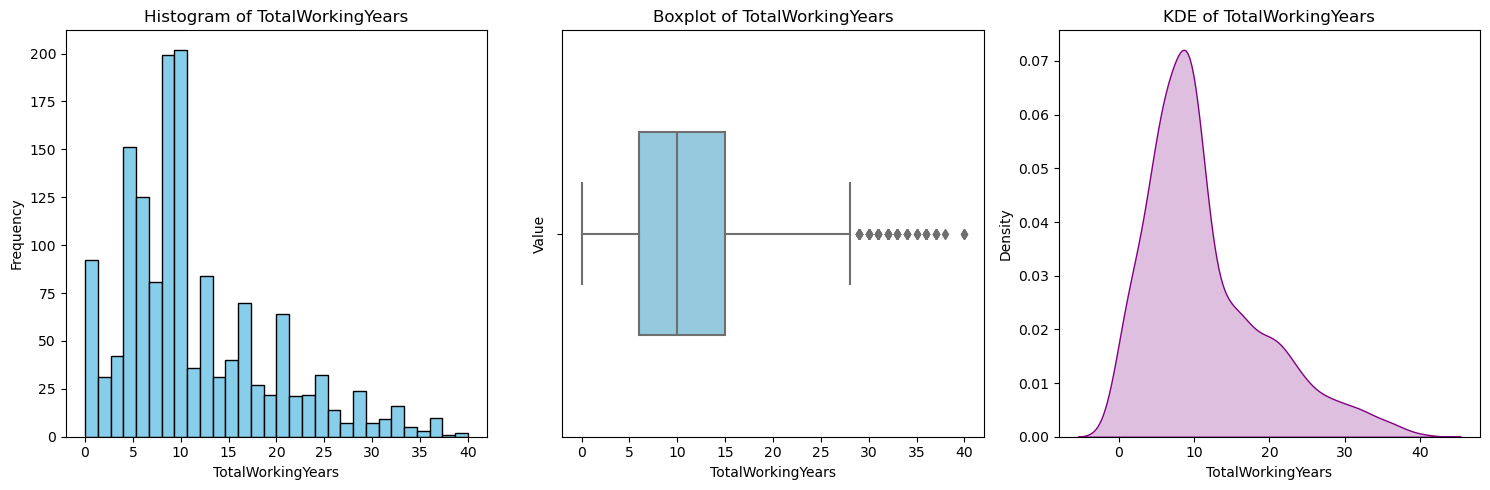

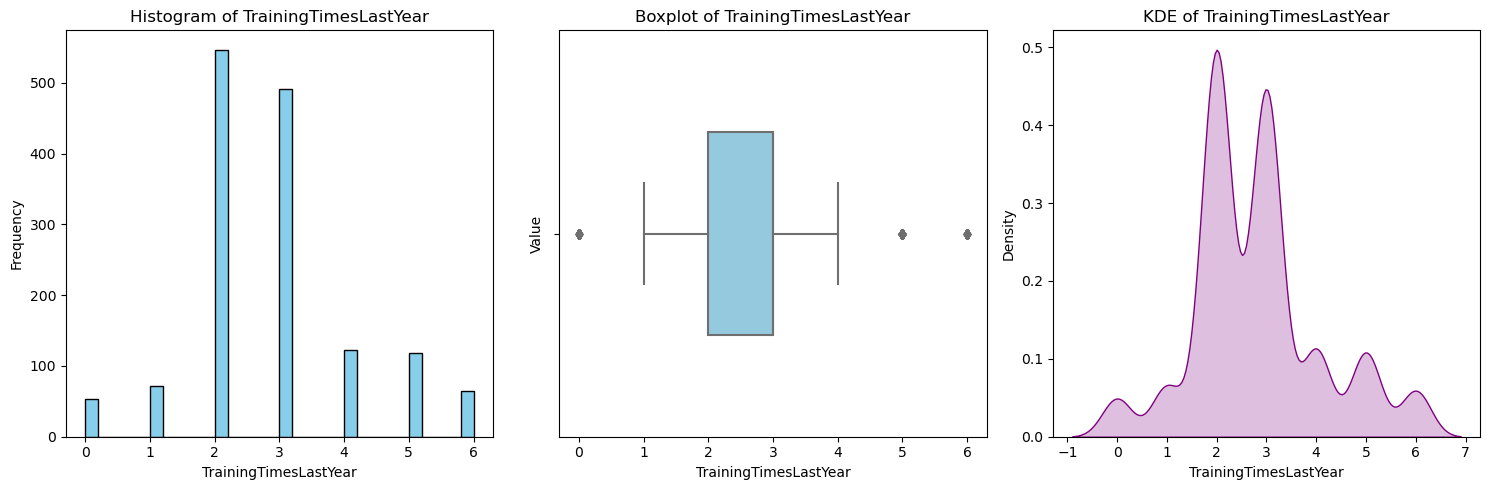

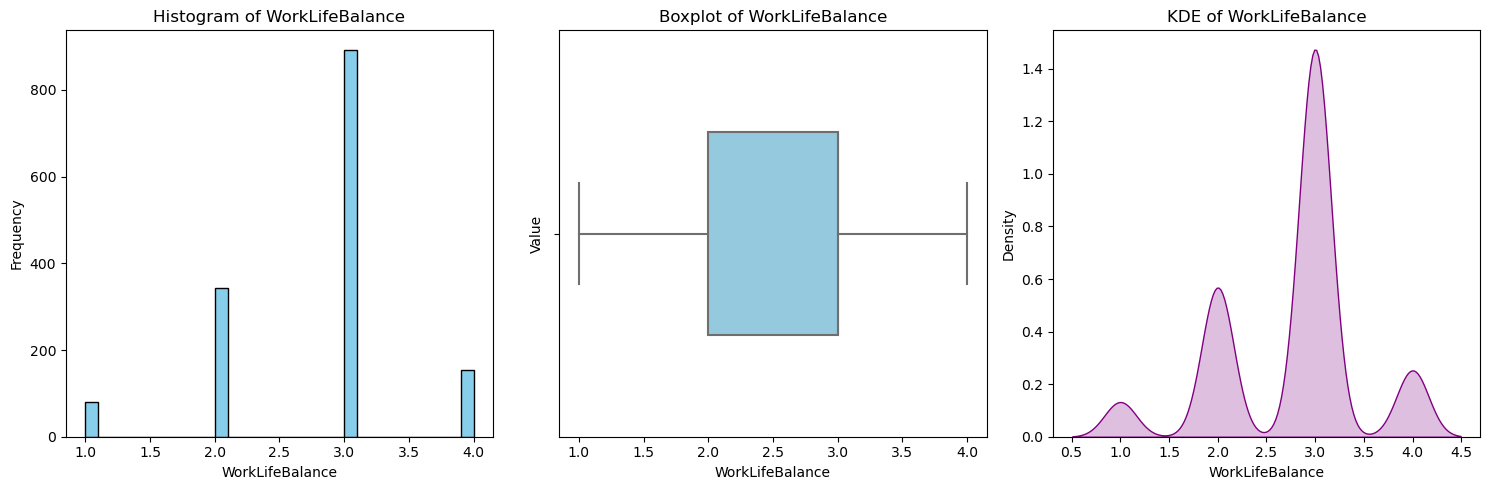

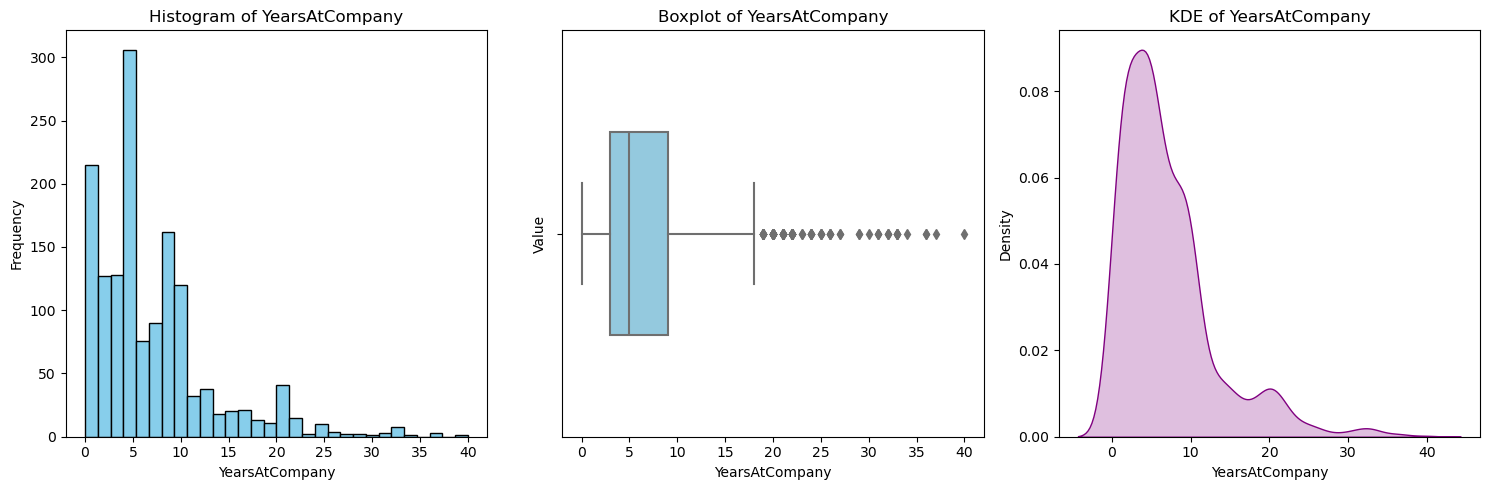

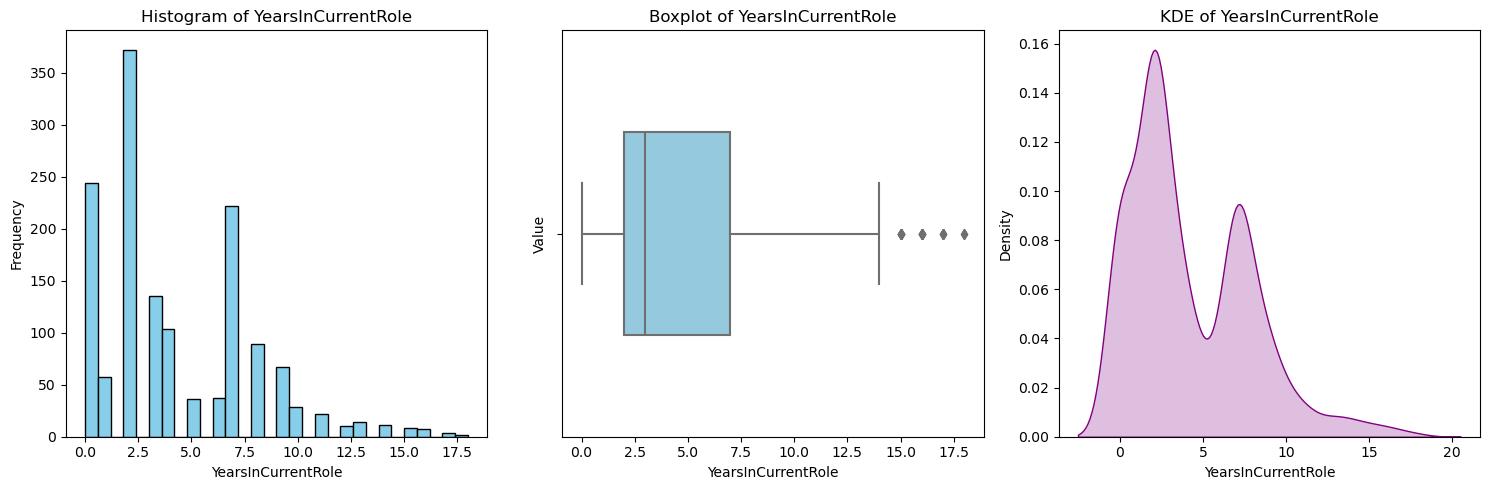

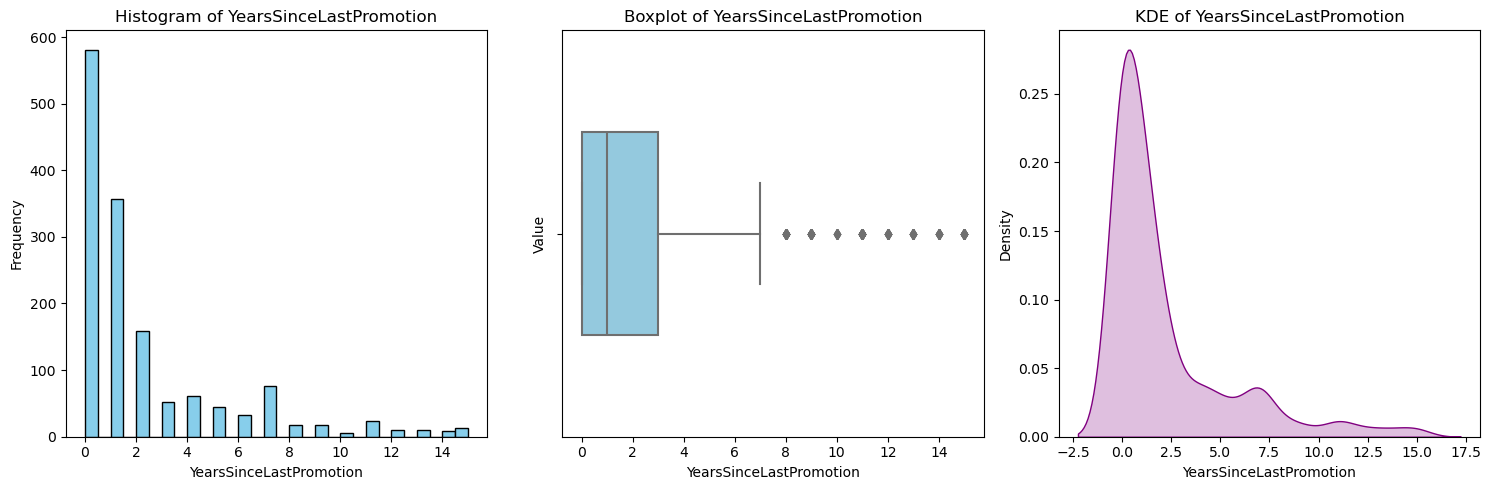

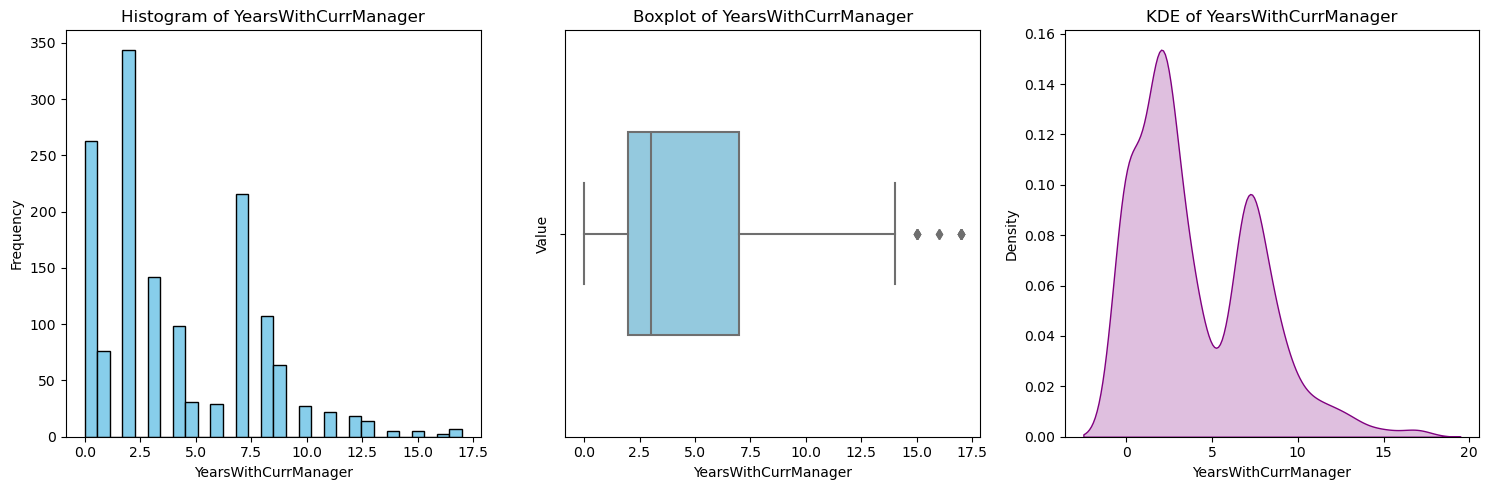

In [13]:
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='purple', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

Attrition by Age distribution

In [ ]:
fig = px.histogram(df, x='Age', color='Attrition', barmode='group', nbins=20, title='Attrition by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

Attrition by gender

In [ ]:
fig = px.sunburst(df,path=['Gender','Attrition'], title='Gender Distribution')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(title_x=0.5)
fig.show()

Attrition by job level

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette='pink')
plt.title("Attrition by Job Level")
plt.show()

Attrition by Departments

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=df, palette ='husl')
plt.title("Attrition by Department")
plt.show()

Monthly income by attrition

In [ ]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set2')
plt.title('Histogram of Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()

Total Working Years by Attrition

In [ ]:
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', bins=15, palette='Set2')
plt.title('Histogram of Total Working Years by Attrition Status')

plt.tight_layout()
plt.show()

Employees with more years of experience might be less likely to leave, as they may have more stability or satisfaction in their careers.
The employees with fewer working years show higher attrition, this may indicate that less experienced employees are more likely to leave.

Relationship between income and experience

In [ ]:
plt.figure(figsize=(13, 5))

# Monthly Income vs. Total Working Years
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, c='b')
plt.title('Monthly Income vs. Total Working Years ')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

Data Preprocessing

Erreurs / anomalies (outliers)

In [ ]:
features_with_outliers = []
for feature in num_cols:
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(df) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Proportion of outliers: {proportion_of_outliers:.2f}%\n")

Vérifier la cohérence des données (équilibre à déterminer pour la séparation de la base train) Check Skewness

In [ ]:
skewed_features = {}
skewed_columns = []


for feature in num_cols:
    skewness = df[feature].skew()
    skewed_features[feature] = skewness
    if skewness > 0.5:
        print(f"{feature} is right skewed with skewness: {skewness}")

for feature in num_cols:
    if skewed_features[feature] > 0.5:
        skewed_columns.append(feature)
        df[feature] = np.log1p(df[feature])


print("Log transformation applied to right-skewed features.")

Feature Engineering

In [ ]:
df['WorkExperience'] = df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)

Work Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager show strong positive correlations.

In [ ]:
df['OverallSatisfaction'] = (
    df[['JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
)

OverallSatisfaction : JobSatisfaction , EnvironmentSatisfaction, RelationshipSatisfaction and WorkLifeBalance

In [ ]:
df=df.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'JobSatisfaction' , 'EnvironmentSatisfaction',
            'RelationshipSatisfaction', 'WorkLifeBalance'],axis=1)

In [ ]:
df.head()


Categorical encoding (categories are transformed into numbers to help analysis)

In [ ]:
cat_cols = df.select_dtypes(include = ['object'])

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
categorical_cols = cat_cols
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

In [ ]:
df.columns

Splitting (train and test dataset)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)  # Selecting all columns except the target
y = df['Attrition']                # Selecting the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")